## '유통데이터 서비스 플랫폼'에서 제공하는 데이터를 분석하여 인사이트 찾기

## 우선 제공되는 데이터는 '구매 데이터' 입니다.

이번 유통데이터 활용 경진대회는 데이터분석에 관심있는 누구나 참가하여 자유주제로 유통데이터를 분석해보시면 됩니다.

## 컬럼설명

* **ID** - 구매 건 별 Identifier
* **Order_ID** - 주문번호
* **User_ID** - 사용자 Identifier
* **Purchase_Data** - 구매 날짜
* **Period** - 구매한 주 차 표시
* **Retailer** - 리테일러 (?) **ex) A, B, C**
* **ProductCode** - 마트에서 부여한 상품코드(바코드, 또는 마트 자체에서 부여한 번호)
* **Item_Description** - 상품명
* **Option** - 상품 옵션
* **Sales_Unit** - 상품을 구매한 개수
* **Price** - 상품의 개당 가격
* **Agegroup** - 연령대 **10,20,30,40**
* **Gender** - 성별
* **MasterProductNo** - 매칭된 마스터 상품번호
* **MasterProductName** - 매칭된 마스터 상품명
* **MasterCategoryFullNo** - 마스터 카테고리 코드
* **MasterCategoryFullName** -마스터 카테고리 이름

In [1]:
# 파이썬의 데이터 분석 패키지
#Pandas(pandas.pydata.org) 를 읽어옵니다.
# Pandas는 쉽게 말해 파이썬으로 엑셀을 다룰 수 있는 툴이라고 보시면 됩니다.
# 이 패키지를 앞으로는 pd라는 축약어로 사용하겠습니다.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [3]:
plt.rcParams['font.family'] = 'Malgun Gothic'

 ## Load Dataset

언제나처럼 모든 데이터 분석의 시작은 주어진 데이터를 읽어오는 것입니다. [판다스(Pandas)](https://pandas.pydata.org/)의 [read_csv](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)를 활용하여 유통데이터의 '카드결제 제공데이터를 불러옵니다.

앞서 [Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic/) 경진대회와 마찬가지로, 여기에서도 파일의 경로를 지정하는 방법에 주의하셔야 합니다. 만일 read_csv를 실행할 때 (**FileNotFoundError**)라는 이름의 에러가 난다면 경로가 제대로 지정이 되지 않은 것입니다. **파일의 경로를 지정하는 법이 생각나지 않는다면 [다음의 링크](http://88240.tistory.com/122)를 통해 경로를 지정하는 법을 복습한 뒤 다시 시도해주세요.**

In [4]:
purchase = pd.read_csv("data/Purchase_Transaction.csv", encoding='cp949')
print(purchase. shape)
purchase.head()

(39620, 16)


C:\Users\IoTSolution\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,Order_Id,User_Id,Purchase_Date,Period,Retailer,ProductCode,Item_Description,Sales_Unit,Price,Agegroup,Gender,MasterProdcutNo,MasterProdcutName,MasterCategoryFullNo,MasterCategoryFullName
0,95717,3475eb780c3eeac686a75a00b6b46257,d41d8cd98f00b204e9800998ecf8427e,2019-01-18 0:00,20190103,A,2.01901E+15,우리가 보낸 가장 긴 밤,1,12400,60,M,2.01901E+15,우리가 보낸 가장 긴 밤,C001002700080009,문구 · 취미 · 자동차용품->도서 · 퍼즐->시 · 에세이
1,95718,3475eb780c3eeac686a75a00b6b46257,981ac26310e4d1ab74ae250b71fb1bbe,2019-01-18 0:00,20190103,A,2.01901E+15,우리가 보낸 가장 긴 밤,1,12400,30,M,2.01901E+15,우리가 보낸 가장 긴 밤,C001002700080009,문구 · 취미 · 자동차용품->도서 · 퍼즐->시 · 에세이
2,162804,b8b60589fc2a00008f6c746e746cfb04,031ed90cf080a7c468879e1715f5e2a9,2019-01-18 0:00,20190103,B,2.01901E+15,우리가 보낸 가장 긴 밤,1,12400,2020,NaN,2.01901E+15,우리가 보낸 가장 긴 밤,C001002700080009,문구 · 취미 · 자동차용품->도서 · 퍼즐->시 · 에세이
3,95723,129cb9a1a99323fac25a823772be46bf,981ac26310e4d1ab74ae250b71fb1bbe,2019-09-02 0:00,20190136,C,8.80111E+12,풀무원 옛두부 300g*2,1,4300,30,M,8.80111E+12,풀무원 옛두부(300G*2입),C001001200110002,채소->두부 · 콩나물 · 나또->부침용 두부
4,95724,64453d5c2038f67ee4b87ed1c1213304,981ac26310e4d1ab74ae250b71fb1bbe,2019-09-02 0:00,20190136,C,1.20855E+12,프리미엄생연어초밥,2,10000,30,M,1.20855E+12,프리미엄생연어초밥,C001004000080002,치킨 · 초밥 · 베이커리->김밥 · 초밥 · 샐러드->김밥 · 초밥 · 도시락


In [5]:
purchase.columns

Index(['id', 'Order_Id', 'User_Id', 'Purchase_Date', 'Period', 'Retailer',
       'ProductCode', 'Item_Description', 'Sales_Unit', 'Price', 'Agegroup',
       'Gender', 'MasterProdcutNo', 'MasterProdcutName',
       'MasterCategoryFullNo', 'MasterCategoryFullName'],
      dtype='object')

YC가 맡은 컬럼:'id', 'Order_Id', 'User_Id', 'Purchase_Date', 'Period','Agegroup','Gender'
저(토마스)가 맡은 컬럼:'Retailer','Sales_Unit', 'Price','ProductCode','Item_Description','MasterProdcutNo', 'MasterProdcutName',
                       'MasterCategoryFullNo', 'MasterCategoryFullName'

In [6]:
df = purchase[['Retailer','Sales_Unit', 'Price','ProductCode','Item_Description',
               'MasterProdcutNo', 'MasterProdcutName',
               'MasterCategoryFullNo', 'MasterCategoryFullName']]

In [7]:
df.head()

,Retailer,Sales_Unit,Price,ProductCode,Item_Description,MasterProdcutNo,MasterProdcutName,MasterCategoryFullNo,MasterCategoryFullName
0,A,1,12400,2.01901E+15,우리가 보낸 가장 긴 밤,2.01901E+15,우리가 보낸 가장 긴 밤,C001002700080009,문구 · 취미 · 자동차용품->도서 · 퍼즐->시 · 에세이
1,A,1,12400,2.01901E+15,우리가 보낸 가장 긴 밤,2.01901E+15,우리가 보낸 가장 긴 밤,C001002700080009,문구 · 취미 · 자동차용품->도서 · 퍼즐->시 · 에세이
2,B,1,12400,2.01901E+15,우리가 보낸 가장 긴 밤,2.01901E+15,우리가 보낸 가장 긴 밤,C001002700080009,문구 · 취미 · 자동차용품->도서 · 퍼즐->시 · 에세이
3,C,1,4300,8.80111E+12,풀무원 옛두부 300g*2,8.80111E+12,풀무원 옛두부(300G*2입),C001001200110002,채소->두부 · 콩나물 · 나또->부침용 두부
4,C,2,10000,1.20855E+12,프리미엄생연어초밥,1.20855E+12,프리미엄생연어초밥,C001004000080002,치킨 · 초밥 · 베이커리->김밥 · 초밥 · 샐러드->김밥 · 초밥 · 도시락


In [8]:
#MasterCategoryFullNo 앞글자 4개만 따서 value_counts를 해보자.
df['MasterCategoryFullNo'].str[:4].value_counts()

C001    37686
C002     1006
C000      928
Name: MasterCategoryFullNo, dtype: int64

In [9]:
#MasterCategoryFullName 앞 두글자가 채소인 것은 몇개가 있을까?
df.loc[df['MasterCategoryFullName'].str[:2]=='채소']

,Retailer,Sales_Unit,Price,ProductCode,Item_Description,MasterProdcutNo,MasterProdcutName,MasterCategoryFullNo,MasterCategoryFullName
3,C,1,4300,8.80111E+12,풀무원 옛두부 300g*2,8.80111E+12,풀무원 옛두부(300G*2입),C001001200110002,채소->두부 · 콩나물 · 나또->부침용 두부
14,C,1,4300,8.80111E+12,풀무원 옛두부 300g*2,8.80111E+12,풀무원 옛두부(300G*2입),C001001200110002,채소->두부 · 콩나물 · 나또->부침용 두부
34,C,1,7900,2E+12,태양건조 표고슬라이,2E+12,태양건조 표고슬라이,C001001200100003,채소->새송이 · 느타리 · 버섯류->건버섯 · 이색버섯
35,C,1,1900,1.14576E+12,(T)양파(1.8kg/망),8.8096E+12,양파(3KG),C001001200060001,채소->양파 · 마늘 · 생강 · 파->양파
37,C,1,1200,1.13276E+12,(T)애호박,1.13276E+12,(T)애호박,C001001200030002,채소->오이 · 호박 · 가지 · 옥수수->애호박 · 호박
...,...,...,...,...,...,...,...,...,...
39568,A,1,1100,430000000000.0,우리지역 하루한끼 깻잎,4.3E+11,우리지역 하루한끼 깻잎,C001001200080001,채소->상추 · 깻잎 · 쌈채소->상추 · 깻잎
39580,C,1,4600,8801110000000.0,풀무원 국산부침 340g,8.80111E+12,풀무원 국산부침 340g,C001001200110003,채소->두부 · 콩나물 · 나또->혼합 · 기능성 두부
39583,C,1,3000,2421080000000.0,무(10입내외),L000003759279,[맛다름] 무 1입,C001001200050001,채소->양배추 · 배추 · 무 · 김장채소->양배추 · 배추 · 무
39592,C,1,9000,2500000000000.0,깐마늘 1kg(봉),2.5E+12,깐마늘 2kg(봉),C001001200060002,채소->양파 · 마늘 · 생강 · 파->마늘 · 생강


In [10]:
#제일 앞 구분 키워드가 '채소'인 것의 shape를 해보았다. 총 4275개 데이터 확인!
df.loc[df['MasterCategoryFullName'].str[:2]=='채소'].shape

(4275, 9)

In [11]:
#MasterCategoryFullNo와 MasterCategoryFullName 컬럼의 연관성을 알아보자!
#제일 앞 구분 키워드가 '채소'이면서 앞자리 10개가 'C001001200'인것은 위와 똑같이 4275개가 나온다.
df.loc[(df['MasterCategoryFullName'].str[:2]=='채소')&(df['MasterCategoryFullNo'].str[:10]=='C001001200')].shape

(4275, 9)

In [12]:
#제일 앞 구분 키워드가 '채소'이면서 앞자리 11개가 'C0010012001'인것은 1460개
df.loc[(df['MasterCategoryFullName'].str[:2]=='채소')&(df['MasterCategoryFullNo'].str[:11]=='C0010012001')].shape

(1460, 9)

In [13]:
#제일 앞 구분 키워드가 '채소'이면서 앞자리 11개가 'C0010012001'가 아닌 것은 2815개로 값이 나뉜다.
df.loc[(df['MasterCategoryFullName'].str[:2]=='채소')&(df['MasterCategoryFullNo'].str[:11]!='C0010012001')].shape

#1460 + 2815 = 4275개로 채소인 키워드를 설명하는 MasterCategoryFullNo는 앞 10자리까지 해당되는 것을 알 수 있다.

(2815, 9)

알수 있는 사실:
앞 11 자리 -> 카테고리 대분류, 중간 3자리 -> 중분류, 뒤 3자리 -> 소분류 로 나뉘는 것을 확인 할 수 있었다.

'->' 문자로 대분류,중분류,소분류가 되어있음을 짐작할 수 있다. split함수를 통해 쪼개보자

In [14]:
df['MasterCategoryFullName2'] = df['MasterCategoryFullName']
for i in range(0,len(df['MasterCategoryFullName'])):
    df['MasterCategoryFullName2'][i] = df['MasterCategoryFullName'][i].split('->')[0]
#새로운 컬럼이름은 MasterCategoryFullName2로 한다.   

C:\Users\IOTSOL~1\AppData\Local\Temp/ipykernel_8396/2421995844.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MasterCategoryFullName2'] = df['MasterCategoryFullName']
C:\Users\IOTSOL~1\AppData\Local\Temp/ipykernel_8396/2421995844.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MasterCategoryFullName2'][i] = df['MasterCategoryFullName'][i].split('->')[0]


In [15]:
# '키워드 -> 키워드 -> 키워드' 형식의 컬럼을 '->' 기호 기준 split 함수를 통해 앞 키워드만 추출해보았다.
pd.DataFrame(df['MasterCategoryFullName2'].value_counts())

,MasterCategoryFullName2
생수 · 과자 · 라면 · 커피,11157
우유 · 냉장냉동 · 간편식,6194
채소,4275
정육 · 계란,2710
주방 · 청소 · 욕실용품,1876
과일,1749
생선 · 건해산물,1476
주류,1006
문구 · 취미 · 자동차용품,955
Unknown,945


대분류로 분리된 'MasterCategoryFullName2' 컬럼을 활용해서 대분류 카테고리 별 총 매출을 알아보자

In [16]:
#총매출 = 판매 개수 * 가격
df['gmv'] = df['Sales_Unit'] * df['Price']

C:\Users\IOTSOL~1\AppData\Local\Temp/ipykernel_8396/2476977801.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gmv'] = df['Sales_Unit'] * df['Price']


In [17]:
# MasterCategoryFullName2 키워드 별 매출
pd.DataFrame(df.groupby('MasterCategoryFullName2').sum()['gmv']).sort_values('gmv',ascending=False).head(10).T

MasterCategoryFullName2,치킨 · 초밥 · 베이커리,채소,생수 · 과자 · 라면 · 커피,우유 · 냉장냉동 · 간편식,Unknown,정육 · 계란,가전,생선 · 건해산물,과일,주방 · 청소 · 욕실용품
gmv,303618900,213964000,153038800,135828000,109400300,35796000,22178000,21314200,18042500,14834500


ProductCode 컬럼과 MasterProdcutNo 컬럼은 비슷한 듯 달라보인다.loc 함수를 통해 값이 같은 데이터와 다른 데이터가 얼마나 있는지 알아보자!

In [18]:
print(df.loc[df['ProductCode']==df['MasterProdcutNo']].shape)
df.loc[df['ProductCode']==df['MasterProdcutNo']].head()
# 두 컬럼이 같은 값은 29412개 있다.

(29412, 11)


,Retailer,Sales_Unit,Price,ProductCode,Item_Description,MasterProdcutNo,MasterProdcutName,MasterCategoryFullNo,MasterCategoryFullName,MasterCategoryFullName2,gmv
0,A,1,12400,2.01901E+15,우리가 보낸 가장 긴 밤,2.01901E+15,우리가 보낸 가장 긴 밤,C001002700080009,문구 · 취미 · 자동차용품->도서 · 퍼즐->시 · 에세이,문구 · 취미 · 자동차용품,12400
1,A,1,12400,2.01901E+15,우리가 보낸 가장 긴 밤,2.01901E+15,우리가 보낸 가장 긴 밤,C001002700080009,문구 · 취미 · 자동차용품->도서 · 퍼즐->시 · 에세이,문구 · 취미 · 자동차용품,12400
2,B,1,12400,2.01901E+15,우리가 보낸 가장 긴 밤,2.01901E+15,우리가 보낸 가장 긴 밤,C001002700080009,문구 · 취미 · 자동차용품->도서 · 퍼즐->시 · 에세이,문구 · 취미 · 자동차용품,12400
3,C,1,4300,8.80111E+12,풀무원 옛두부 300g*2,8.80111E+12,풀무원 옛두부(300G*2입),C001001200110002,채소->두부 · 콩나물 · 나또->부침용 두부,채소,4300
4,C,2,10000,1.20855E+12,프리미엄생연어초밥,1.20855E+12,프리미엄생연어초밥,C001004000080002,치킨 · 초밥 · 베이커리->김밥 · 초밥 · 샐러드->김밥 · 초밥 · 도시락,치킨 · 초밥 · 베이커리,20000


In [19]:
print(df.loc[df['ProductCode']!=df['MasterProdcutNo']].shape)
df.loc[df['ProductCode']!=df['MasterProdcutNo']].head(30)
# 두 컬럼이 다른 값은 10208개 있다.

(10208, 11)


,Retailer,Sales_Unit,Price,ProductCode,Item_Description,MasterProdcutNo,MasterProdcutName,MasterCategoryFullNo,MasterCategoryFullName,MasterCategoryFullName2,gmv
6,C,1,7000,2.5E+12,제스프리그린키위/팩,2.00015E+12,제스프리그린키위팩,C001001300040001,과일->키위 · 참다래->그린키위,과일,7000
17,C,1,7000,2.5E+12,제스프리그린키위/팩,2.00015E+12,제스프리그린키위팩,C001001300040001,과일->키위 · 참다래->그린키위,과일,7000
35,C,1,1900,1.14576E+12,(T)양파(1.8kg/망),8.8096E+12,양파(3KG),C001001200060001,채소->양파 · 마늘 · 생강 · 파->양파,채소,1900
42,C,1,5500,2.5E+12,양장피,L000003731510,양장피 (2인),C001001200060004,채소->양파 · 마늘 · 생강 · 파->간편양념 · 채소,채소,5500
62,C,1,3800,2.45979E+12,뉴질랜드산 아보카도,4.30001E+11,[제] 뉴질랜드산 아보카도(30과),C001001300170001,과일->망고 · 용과 · 기타열대과일->망고 · 용과 · 기타열대과일,과일,3800
71,C,2,4500,8.80101E+12,CJ 비비고 차돌깍두기,L000001775934,[CJ직배송] 비비고 차돌깍두기볶음밥 410gX3,C001001600080002,우유 · 냉장냉동 · 간편식->가정간편식->냉동 밥 · 면류,우유 · 냉장냉동 · 간편식,9000
88,C,2,26800,8.80914E+12,백진미오징어 300g*2,8.80919E+12,백진미 오징어(300G),C001001500100002,생선 · 건해산물->건오징어 · 어포 · 육포 · 기타->백진미 · 홍진미,생선 · 건해산물,53600
113,C,1,4000,1.1117E+12,편육,2.49375E+12,편육,C001001600080004,우유 · 냉장냉동 · 간편식->가정간편식->야식 · 안주 · 볶음류,우유 · 냉장냉동 · 간편식,4000
128,C,1,4300,8.80144E+12,오이비누100g*4,10050088,오이비누100g*3+1(18) (100g*(3+1)),C001013900010002,바디케어->바디클렌저->비누,바디케어,4300
138,C,1,3700,8.80925E+12,하이몬쌀국수장국220g,L000003477104,하이몬 쌀국수장국 220g,C001001700060004,생수 · 과자 · 라면 · 커피->소스류 · 케찹 · 마요네즈->국물 · 양념소스,생수 · 과자 · 라면 · 커피,3700


In [20]:
df['ProductCode'].value_counts()

2.00013E+12        2891
2.00012E+12        2030
2.5E+12            1831
8.80105E+12        1577
2.00011E+12        1383
                   ... 
2.32402E+12           1
8.85276E+12           1
2.68618E+12           1
4.97656E+12           1
8801760000000.0       1
Name: ProductCode, Length: 2883, dtype: int64

In [21]:
df.loc[df['ProductCode']==2.00013E+12]

,Retailer,Sales_Unit,Price,ProductCode,Item_Description,MasterProdcutNo,MasterProdcutName,MasterCategoryFullNo,MasterCategoryFullName,MasterCategoryFullName2,gmv
32817,B,1,4000,2000130000000.0,펩시콜라밀키스1.5기,2.00013E+12,펩시콜라밀키스1.5기,C001001700130004,생수 · 과자 · 라면 · 커피->생수 · 음료 · 두유->페트 탄산음료,생수 · 과자 · 라면 · 커피,4000
32835,B,1,2300,2000130000000.0,후레쉬오리지널우유,2.00013E+12,후레쉬오리지널우유,C001001600090001,우유 · 냉장냉동 · 간편식->우유 · 요구르트->흰우유,우유 · 냉장냉동 · 간편식,2300
32836,B,1,1700,2000130000000.0,롯데_키세스봉밀크_52,2.00013E+12,롯데_키세스봉밀크_52,C001001700150007,생수 · 과자 · 라면 · 커피->초콜릿 · 캔디 · 껌->판 초콜릿,생수 · 과자 · 라면 · 커피,1700
32840,B,1,14000,2000130000000.0,꽃샘사양벌꿀800G*2,8.80322E+12,꽃샘 사양벌꿀(2KG),C001015100030001,건강소재 · 꿀->꿀->일반꿀,건강소재 · 꿀,14000
32884,B,1,2500,2000130000000.0,아녜지부가티니,2.00013E+12,아녜지부가티니,C001002700070009,문구 · 취미 · 자동차용품->팬시 · 파티용품 · 향초->기타팬시용품,문구 · 취미 · 자동차용품,2500
...,...,...,...,...,...,...,...,...,...,...,...
39530,B,1,6000,2000130000000.0,바란스화이트봉15m,2.00013E+12,바란스화이트봉15m,C001011500010009,침구 · 데코 · 원예->침구 · 커튼->커튼,침구 · 데코 · 원예,6000
39531,B,1,9000,2000130000000.0,대천도시락김20봉,2.00013E+12,대천도시락김20봉,C001001500080008,생선 · 건해산물->조미김 · 생김->식탁김,생선 · 건해산물,9000
39563,B,1,4000,2000130000000.0,열대어k_4000,2.00013E+12,열대어k_4000,C001002500010017,가구 · 수납 · 조명 · 보수->가구->인테리어가구,가구 · 수납 · 조명 · 보수,4000
39564,B,1,13900,2000130000000.0,몬스터_헬멧_블랙,2.00013E+12,몬스터_헬멧_블랙,C001003000020004,스포츠 · 레저->자전거 · 인라인->인라인 · 스케이트,스포츠 · 레저,13900


In [22]:
df['MasterProdcutNo'].value_counts()

2.00013E+12      3049
2.00012E+12      2097
2.5E+12          2027
8.80105E+12      1932
8.80112E+12      1442
                 ... 
5.00017E+12         1
L000003281794       1
5.04525E+12         1
8.80516E+12         1
8.00799E+12         1
Name: MasterProdcutNo, Length: 2843, dtype: int64

In [23]:
df.loc[df['MasterProdcutNo']=='2.00013E+12']

,Retailer,Sales_Unit,Price,ProductCode,Item_Description,MasterProdcutNo,MasterProdcutName,MasterCategoryFullNo,MasterCategoryFullName,MasterCategoryFullName2,gmv
2010,B,1,59900,2.00013E+12,자동차정비센터,2.00013E+12,자동차정비센터,C001002700030004,문구 · 취미 · 자동차용품->노트->기타일반노트,문구 · 취미 · 자동차용품,59900
2011,B,1,13000,2.00013E+12,스트레치드레스셔츠,2.00013E+12,스트레치드레스셔츠,C001002800010001,성인 · 아동의류->남성의류->남성티셔츠,성인 · 아동의류,13000
2012,B,1,6000,2.00013E+12,슬림스트레치드레스셔,2.00013E+12,슬림스트레치드레스셔,C001002800010001,성인 · 아동의류->남성의류->남성티셔츠,성인 · 아동의류,6000
2013,B,1,13000,2.00013E+12,슬림스트레치드레스셔,2.00013E+12,슬림스트레치드레스셔,C001002800010001,성인 · 아동의류->남성의류->남성티셔츠,성인 · 아동의류,13000
2592,B,1,5000,2.00013E+12,GT슈퍼밀크,2.00013E+12,GT슈퍼밀크,C001001600090001,우유 · 냉장냉동 · 간편식->우유 · 요구르트->흰우유,우유 · 냉장냉동 · 간편식,5000
...,...,...,...,...,...,...,...,...,...,...,...
39530,B,1,6000,2000130000000.0,바란스화이트봉15m,2.00013E+12,바란스화이트봉15m,C001011500010009,침구 · 데코 · 원예->침구 · 커튼->커튼,침구 · 데코 · 원예,6000
39531,B,1,9000,2000130000000.0,대천도시락김20봉,2.00013E+12,대천도시락김20봉,C001001500080008,생선 · 건해산물->조미김 · 생김->식탁김,생선 · 건해산물,9000
39563,B,1,4000,2000130000000.0,열대어k_4000,2.00013E+12,열대어k_4000,C001002500010017,가구 · 수납 · 조명 · 보수->가구->인테리어가구,가구 · 수납 · 조명 · 보수,4000
39564,B,1,13900,2000130000000.0,몬스터_헬멧_블랙,2.00013E+12,몬스터_헬멧_블랙,C001003000020004,스포츠 · 레저->자전거 · 인라인->인라인 · 스케이트,스포츠 · 레저,13900


In [24]:
df.loc[df['ProductCode']=='2.00013E+12']

,Retailer,Sales_Unit,Price,ProductCode,Item_Description,MasterProdcutNo,MasterProdcutName,MasterCategoryFullNo,MasterCategoryFullName,MasterCategoryFullName2,gmv
2010,B,1,59900,2.00013E+12,자동차정비센터,2.00013E+12,자동차정비센터,C001002700030004,문구 · 취미 · 자동차용품->노트->기타일반노트,문구 · 취미 · 자동차용품,59900
2011,B,1,13000,2.00013E+12,스트레치드레스셔츠,2.00013E+12,스트레치드레스셔츠,C001002800010001,성인 · 아동의류->남성의류->남성티셔츠,성인 · 아동의류,13000
2012,B,1,6000,2.00013E+12,슬림스트레치드레스셔,2.00013E+12,슬림스트레치드레스셔,C001002800010001,성인 · 아동의류->남성의류->남성티셔츠,성인 · 아동의류,6000
2013,B,1,13000,2.00013E+12,슬림스트레치드레스셔,2.00013E+12,슬림스트레치드레스셔,C001002800010001,성인 · 아동의류->남성의류->남성티셔츠,성인 · 아동의류,13000
2592,B,1,5000,2.00013E+12,GT슈퍼밀크,2.00013E+12,GT슈퍼밀크,C001001600090001,우유 · 냉장냉동 · 간편식->우유 · 요구르트->흰우유,우유 · 냉장냉동 · 간편식,5000
...,...,...,...,...,...,...,...,...,...,...,...
32684,B,1,6000,2.00013E+12,비비고직화구이김,2.00013E+12,비비고직화구이김,C001001600040016,우유 · 냉장냉동 · 간편식->젓갈 · 포장김치 · 냉장반찬->밑반찬,우유 · 냉장냉동 · 간편식,6000
32685,B,1,6500,2.00013E+12,1등급_대란_30구,2.00013E+12,1등급_대란_30구,C001001400070002,정육 · 계란->계란->계란 15구이상,정육 · 계란,6500
32713,B,2,400,2.00013E+12,거제점재사용봉투10L,2.00013E+12,거제점재사용봉투20L,C00000000000,Unknown,Unknown,800
32715,B,1,14000,2.00013E+12,허니순살닭강정,2.00013E+12,허니순살닭강정,C001005900050001,가전->휴대폰 · 스마트폰 · 악세서리->휴대폰케이스 · 필름,가전,14000


Item_Description 컬럼과 MasterProdcutName 컬럼의 정확한 차이는 알 수 없었다. 하지만 확실한 것은 이 두 컬럼의 데이터 값은 같은 제품을 가르키고 있는 것은 분명하다.
예를들어, 32840번째 데이터에서 'Item_Description'컬럼은 '꽃샘사양벌꿀800G*2'이며, 'MasterProdcutName' 컬럼은 '꽃샘 사양벌꿀(2KG)'
정확한 값은 차이가 있지만, 이 두 컬럼은 모두 꽃샘사양벌꿀을 가르키는 것은 분명하다. 다른 데이터들도 마찬가지로 기호 및 단위, 문자열의 차이가 있을 뿐, 가르키는 제품에 대해서는 차이가 없는 것으로 보인다.

In [25]:
df.loc[df['ProductCode']==2.00013E+12].head(3)

,Retailer,Sales_Unit,Price,ProductCode,Item_Description,MasterProdcutNo,MasterProdcutName,MasterCategoryFullNo,MasterCategoryFullName,MasterCategoryFullName2,gmv
32817,B,1,4000,2000130000000.0,펩시콜라밀키스1.5기,2.00013E+12,펩시콜라밀키스1.5기,C001001700130004,생수 · 과자 · 라면 · 커피->생수 · 음료 · 두유->페트 탄산음료,생수 · 과자 · 라면 · 커피,4000
32835,B,1,2300,2000130000000.0,후레쉬오리지널우유,2.00013E+12,후레쉬오리지널우유,C001001600090001,우유 · 냉장냉동 · 간편식->우유 · 요구르트->흰우유,우유 · 냉장냉동 · 간편식,2300
32836,B,1,1700,2000130000000.0,롯데_키세스봉밀크_52,2.00013E+12,롯데_키세스봉밀크_52,C001001700150007,생수 · 과자 · 라면 · 커피->초콜릿 · 캔디 · 껌->판 초콜릿,생수 · 과자 · 라면 · 커피,1700


이번엔 Retailer 컬럼을 중점으로 알아보자!

In [26]:
df['Retailer'].value_counts()

C    19637
B    11761
A     8222
Name: Retailer, dtype: int64

In [27]:
df.groupby('Retailer').sum()[['gmv']]

,gmv
Retailer,
A,857345400
B,75127700
C,184435700


In [28]:
pd.pivot_table(index=['Retailer','Sales_Unit'],data=df,aggfunc=np.sum)

Price        gmv
Retailer Sales_Unit                      
A        1           841422600  841422600
         2             3447600    6895200
         3              517300    1551900
         4              259700    1038800
         5              129100     645500
...                        ...        ...
C        41                100       4100
         50              28100    1405000
         52              38500    2002000
         71               1000      71000
         399               100      39900

[84 rows x 2 columns]

In [29]:
print(purchase.shape)
purchase.head()

(39620, 16)


,id,Order_Id,User_Id,Purchase_Date,Period,Retailer,ProductCode,Item_Description,Sales_Unit,Price,Agegroup,Gender,MasterProdcutNo,MasterProdcutName,MasterCategoryFullNo,MasterCategoryFullName
0,95717,3475eb780c3eeac686a75a00b6b46257,d41d8cd98f00b204e9800998ecf8427e,2019-01-18 0:00,20190103,A,2.01901E+15,우리가 보낸 가장 긴 밤,1,12400,60,M,2.01901E+15,우리가 보낸 가장 긴 밤,C001002700080009,문구 · 취미 · 자동차용품->도서 · 퍼즐->시 · 에세이
1,95718,3475eb780c3eeac686a75a00b6b46257,981ac26310e4d1ab74ae250b71fb1bbe,2019-01-18 0:00,20190103,A,2.01901E+15,우리가 보낸 가장 긴 밤,1,12400,30,M,2.01901E+15,우리가 보낸 가장 긴 밤,C001002700080009,문구 · 취미 · 자동차용품->도서 · 퍼즐->시 · 에세이
2,162804,b8b60589fc2a00008f6c746e746cfb04,031ed90cf080a7c468879e1715f5e2a9,2019-01-18 0:00,20190103,B,2.01901E+15,우리가 보낸 가장 긴 밤,1,12400,2020,NaN,2.01901E+15,우리가 보낸 가장 긴 밤,C001002700080009,문구 · 취미 · 자동차용품->도서 · 퍼즐->시 · 에세이
3,95723,129cb9a1a99323fac25a823772be46bf,981ac26310e4d1ab74ae250b71fb1bbe,2019-09-02 0:00,20190136,C,8.80111E+12,풀무원 옛두부 300g*2,1,4300,30,M,8.80111E+12,풀무원 옛두부(300G*2입),C001001200110002,채소->두부 · 콩나물 · 나또->부침용 두부
4,95724,64453d5c2038f67ee4b87ed1c1213304,981ac26310e4d1ab74ae250b71fb1bbe,2019-09-02 0:00,20190136,C,1.20855E+12,프리미엄생연어초밥,2,10000,30,M,1.20855E+12,프리미엄생연어초밥,C001004000080002,치킨 · 초밥 · 베이커리->김밥 · 초밥 · 샐러드->김밥 · 초밥 · 도시락


In [30]:
#공통적으로 "연도 + '01' + 연도기준주차" 형태로 구성이 된 것을 볼 수 있다.
purchase['Period'].value_counts().index

Int64Index([20200138, 20200136, 20200137, 20200135, 20200139, 20200134,
            20200140, 20200133, 20200132, 20200131, 20200130, 20200127,
            20200128, 20200129, 20190152, 20200111, 20200114, 20200126,
            20200113, 20200109, 20200115, 20200112, 20190150, 20190151,
            20200108, 20190149, 20200110, 20200117, 20200116, 20190146,
            20200118, 20200105, 20190147, 20200103, 20200125, 20200107,
            20190148, 20200106, 20200104, 20200102, 20190145, 20190144,
            20200101, 20200120, 20200123, 20190140, 20200124, 20190101,
            20200119, 20190142, 20200122, 20190143, 20190141, 20200121,
            20190136, 20190138, 20190103],
           dtype='int64')

YC가 분석한 자료를 토대로 교차분석을 해보자!!

In [31]:
purchase = pd.read_csv("data/Purchase_Transaction.csv",encoding='cp949')
print(purchase. shape)
purchase[["id", "Order_Id","Purchase_Date","Period"]]
purchase['Purchase_Date'] = pd.to_datetime(purchase['Purchase_Date'])
purchase['Purchase_Date-year'] = purchase['Purchase_Date'].dt.year
purchase['Purchase_Date-month'] = purchase['Purchase_Date'].dt.month
purchase['datetime_dayofweek'] = purchase['Purchase_Date'].dt.day_name()
purchase["datetime-dayofweek(int)"] = purchase['Purchase_Date'].dt.dayofweek
purchase.drop(2,inplace=True) 
purchase.head()

(39620, 16)


C:\Users\IoTSolution\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,Order_Id,User_Id,Purchase_Date,Period,Retailer,ProductCode,Item_Description,Sales_Unit,Price,Agegroup,Gender,MasterProdcutNo,MasterProdcutName,MasterCategoryFullNo,MasterCategoryFullName,Purchase_Date-year,Purchase_Date-month,datetime_dayofweek,datetime-dayofweek(int)
0,95717,3475eb780c3eeac686a75a00b6b46257,d41d8cd98f00b204e9800998ecf8427e,2019-01-18,20190103,A,2.01901E+15,우리가 보낸 가장 긴 밤,1,12400,60,M,2.01901E+15,우리가 보낸 가장 긴 밤,C001002700080009,문구 · 취미 · 자동차용품->도서 · 퍼즐->시 · 에세이,2019,1,Friday,4
1,95718,3475eb780c3eeac686a75a00b6b46257,981ac26310e4d1ab74ae250b71fb1bbe,2019-01-18,20190103,A,2.01901E+15,우리가 보낸 가장 긴 밤,1,12400,30,M,2.01901E+15,우리가 보낸 가장 긴 밤,C001002700080009,문구 · 취미 · 자동차용품->도서 · 퍼즐->시 · 에세이,2019,1,Friday,4
3,95723,129cb9a1a99323fac25a823772be46bf,981ac26310e4d1ab74ae250b71fb1bbe,2019-09-02,20190136,C,8.80111E+12,풀무원 옛두부 300g*2,1,4300,30,M,8.80111E+12,풀무원 옛두부(300G*2입),C001001200110002,채소->두부 · 콩나물 · 나또->부침용 두부,2019,9,Monday,0
4,95724,64453d5c2038f67ee4b87ed1c1213304,981ac26310e4d1ab74ae250b71fb1bbe,2019-09-02,20190136,C,1.20855E+12,프리미엄생연어초밥,2,10000,30,M,1.20855E+12,프리미엄생연어초밥,C001004000080002,치킨 · 초밥 · 베이커리->김밥 · 초밥 · 샐러드->김밥 · 초밥 · 도시락,2019,9,Monday,0
5,95725,1501590f2e9f4c521f1d6f0337276621,981ac26310e4d1ab74ae250b71fb1bbe,2019-09-02,20190136,C,2.5E+12,완숙토마토6~8입/팩,1,5000,30,M,2.5E+12,완숙토마토6~8입/팩,C001001300050001,과일->토마토 · 수박 · 참외 · 메론->토마토,2019,9,Monday,0


<AxesSubplot:xlabel='Agegroup', ylabel='count'>

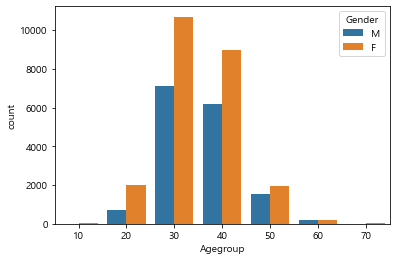

In [32]:
sns.countplot(data = purchase, x = 'Agegroup', hue = 'Gender')
#여성의 구매력이 강함
#주 구매층은 30~40대임

#그럼 30~40대는 무엇을 주로 구매했을까? #추가 분석 필요 (남.여)

In [33]:
#여성이면서 30~40대 고객은 어떤 종류의 제품을 산걸까?
purchase_F = purchase.loc[purchase['Gender']=='F'].loc[(purchase['Agegroup']==30)|(purchase['Agegroup']==40)]
purchase_F.reset_index(drop=True,inplace=True)
print(purchase_F.shape)
purchase_F.head(3)

(19650, 20)


,id,Order_Id,User_Id,Purchase_Date,Period,Retailer,ProductCode,Item_Description,Sales_Unit,Price,Agegroup,Gender,MasterProdcutNo,MasterProdcutName,MasterCategoryFullNo,MasterCategoryFullName,Purchase_Date-year,Purchase_Date-month,datetime_dayofweek,datetime-dayofweek(int)
0,126903,7e7374e95d9e06c98a185de1d43393e7,6db865d3c9bb4f313de223f54dbb2bfe,2019-10-02,20190140,C,2.5E+12,양장피,1,5500,30,F,L000003731510,양장피 (2인),C001001200060004,채소->양파 · 마늘 · 생강 · 파->간편양념 · 채소,2019,10,Wednesday,2
1,126904,17660bf6e1807d436f4f999c6b3e6891,6db865d3c9bb4f313de223f54dbb2bfe,2019-10-02,20190140,C,8.8096E+12,피코크 메밀소바 4인,1,3500,30,F,8.8096E+12,피코크 메밀소바 4인,C001001600030004,우유 · 냉장냉동 · 간편식->냉장면 · 냉장떡->칼국수 · 쫄면 외,2019,10,Wednesday,2
2,126905,4db008ddc0b9480f86a176cdc94a6312,6db865d3c9bb4f313de223f54dbb2bfe,2019-10-02,20190140,C,2.5E+12,영월캠벨포도 2~4입/,1,4800,30,F,2.5E+12,국산의힘]영월캠벨포,C001001600080003,우유 · 냉장냉동 · 간편식->가정간편식->간식 · 디저트,2019,10,Wednesday,2


In [34]:
purchase_F['MasterCategoryFullName2'] = purchase_F['MasterCategoryFullName']

for i in range(0,len(purchase_F['MasterCategoryFullName'])):
    purchase_F['MasterCategoryFullName2'][i] = purchase_F['MasterCategoryFullName'][i].split('->')[0]

C:\Users\IOTSOL~1\AppData\Local\Temp/ipykernel_8396/1824192895.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  purchase_F['MasterCategoryFullName2'][i] = purchase_F['MasterCategoryFullName'][i].split('->')[0]


In [141]:
#30~40여성이 사는 구매품목 카테고리(대분류) TOP10은 다음과 같이 나오는 걸 확인할 수 있다.
pd.DataFrame(purchase_F['MasterCategoryFullName2'].value_counts()).head(10)

,MasterCategoryFullName2
생수 · 과자 · 라면 · 커피,5626
우유 · 냉장냉동 · 간편식,3090
채소,2174
정육 · 계란,1370
주방 · 청소 · 욕실용품,958
과일,827
생선 · 건해산물,747
문구 · 취미 · 자동차용품,464
Unknown,461
주류,431


In [ ]:
hue_order = ['생수 · 과자 · 라면 · 커피','우유 · 냉장냉동 · 간편식','생선 · 건해산물']

C:\Users\IoTSolution\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


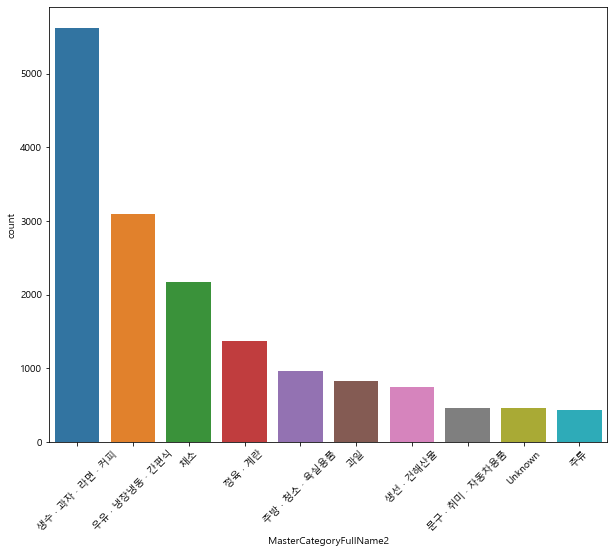

In [170]:
plt.figure(figsize=(10,8))
sns.countplot(purchase_F['MasterCategoryFullName2'], order = purchase_F['MasterCategoryFullName2'].value_counts().index[:10])
plt.xticks(rotation=45)
plt.show()

In [125]:
pd.DataFrame(purchase_F['MasterCategoryFullName2'].value_counts()).tail(13)

,MasterCategoryFullName2
풋 · 핸드케어,45
헤어케어,45
슈즈,43
바디케어,34
이너뷰티,15
장 건강,13
남성케어,10
비타민 · 미네랄,6
홍삼 · 면역,6
건강소재 · 꿀,6


In [101]:
#이번엔 30~40 남성이 사는 구매품목 카테고리(대분류) TOP10을 알아보자!
#남성이면서 30~40대 고객은 어떤 종류의 제품을 산걸까?
purchase_M = purchase.loc[purchase['Gender']=='M'].loc[(purchase['Agegroup']==30)|(purchase['Agegroup']==40)]
purchase_M.reset_index(drop=True,inplace=True)
print(purchase_F.shape)
purchase_M.head(3)

(19650, 21)


,id,Order_Id,User_Id,Purchase_Date,Period,Retailer,ProductCode,Item_Description,Sales_Unit,Price,...,Gender,MasterProdcutNo,MasterProdcutName,MasterCategoryFullNo,MasterCategoryFullName,Purchase_Date-year,Purchase_Date-month,datetime_dayofweek,datetime-dayofweek(int),MasterCategoryFullName2
0,95718,3475eb780c3eeac686a75a00b6b46257,981ac26310e4d1ab74ae250b71fb1bbe,2019-01-18,20190103,A,2.01901E+15,우리가 보낸 가장 긴 밤,1,12400,...,M,2.01901E+15,우리가 보낸 가장 긴 밤,C001002700080009,문구 · 취미 · 자동차용품->도서 · 퍼즐->시 · 에세이,2019,1,Friday,4,문구 · 취미 · 자동차용품
1,95723,129cb9a1a99323fac25a823772be46bf,981ac26310e4d1ab74ae250b71fb1bbe,2019-09-02,20190136,C,8.80111E+12,풀무원 옛두부 300g*2,1,4300,...,M,8.80111E+12,풀무원 옛두부(300G*2입),C001001200110002,채소->두부 · 콩나물 · 나또->부침용 두부,2019,9,Monday,0,채소->두부 · 콩나물 · 나또->부침용 두부
2,95724,64453d5c2038f67ee4b87ed1c1213304,981ac26310e4d1ab74ae250b71fb1bbe,2019-09-02,20190136,C,1.20855E+12,프리미엄생연어초밥,2,10000,...,M,1.20855E+12,프리미엄생연어초밥,C001004000080002,치킨 · 초밥 · 베이커리->김밥 · 초밥 · 샐러드->김밥 · 초밥 · 도시락,2019,9,Monday,0,치킨 · 초밥 · 베이커리->김밥 · 초밥 · 샐러드->김밥 · 초밥 · 도시락


In [102]:
purchase_M['MasterCategoryFullName2'] = purchase_M['MasterCategoryFullName']

for i in range(0,len(purchase_M['MasterCategoryFullName'])):
    purchase_M['MasterCategoryFullName2'][i] = purchase_M['MasterCategoryFullName'][i].split('->')[0]

C:\Users\IOTSOL~1\AppData\Local\Temp/ipykernel_19212/3794534044.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  purchase_M['MasterCategoryFullName2'][i] = purchase_M['MasterCategoryFullName'][i].split('->')[0]


In [121]:
#30~40여성이 사는 구매품목 카테고리(대분류) TOP10은 다음과 같이 나오는 걸 확인할 수 있다.
pd.DataFrame(purchase_M['MasterCategoryFullName2'].value_counts()).head(10)
#비율 달아보기

,MasterCategoryFullName2
생수 · 과자 · 라면 · 커피,3753
우유 · 냉장냉동 · 간편식,2072
채소,1286
정육 · 계란,883
과일,609
주방 · 청소 · 욕실용품,602
생선 · 건해산물,502
주류,420
문구 · 취미 · 자동차용품,359
Unknown,303


C:\Users\IoTSolution\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


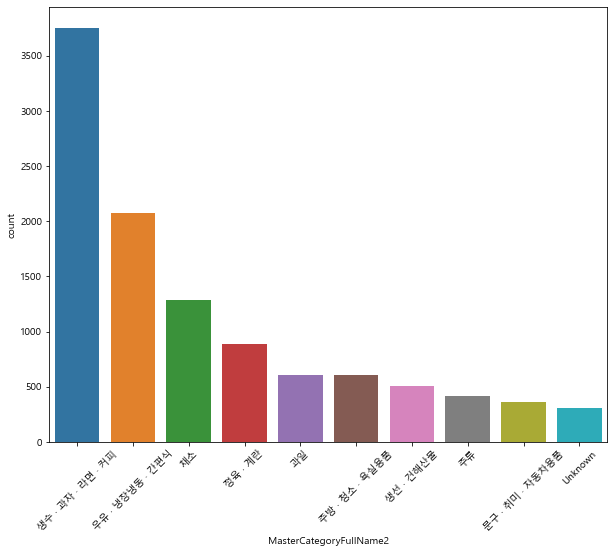

In [169]:
plt.figure(figsize=(10,8))
sns.countplot(purchase_M['MasterCategoryFullName2'], order = purchase_M['MasterCategoryFullName2'].value_counts().index[:10])
plt.xticks(rotation=45)
plt.show()

In [185]:
purchase['MasterCategoryFullName2'] = purchase['MasterCategoryFullName']
purchase.reset_index(drop=True,inplace=True)
for i in range(0,len(purchase['MasterCategoryFullName'])):
    purchase['MasterCategoryFullName2'][i] = purchase['MasterCategoryFullName'][i].split('->')[0]

C:\Users\IOTSOL~1\AppData\Local\Temp/ipykernel_19212/503980460.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  purchase['MasterCategoryFullName2'][i] = purchase['MasterCategoryFullName'][i].split('->')[0]


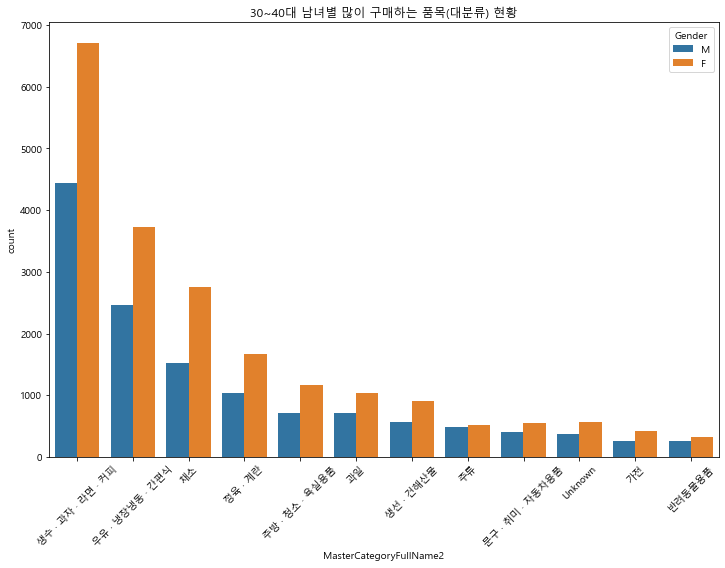

In [193]:
plt.figure(figsize=(12,8))
sns.countplot(data=purchase, x='MasterCategoryFullName2',hue='Gender',
              order = purchase['MasterCategoryFullName2'].value_counts().index[:12])
plt.title('30~40대 남녀별 많이 구매하는 품목(대분류) 현황')
plt.xticks(rotation=45)
plt.show()

In [ ]:
pur

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(purchase_F['MasterCategoryFullName2'], order = purchase_F['MasterCategoryFullName2'].value_counts().index[:10])
plt.xticks(rotation=45)
plt.show()

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(purchase_M['MasterCategoryFullName2'], order = purchase_M['MasterCategoryFullName2'].value_counts().index[:10])
plt.xticks(rotation=45)
plt.show()

In [127]:
pd.DataFrame(purchase_M['MasterCategoryFullName2'].value_counts()).tail(16)

,MasterCategoryFullName2
페이셜케어,44
바디케어,36
건강용품,36
패션잡화,29
슈즈,27
풋 · 핸드케어,25
남성케어,17
비타민 · 미네랄,8
건강소재 · 꿀,7
홍삼 · 면역,7


In [ ]:
['풋 · 핸드케어', '헤어케어', '슈즈', '바디케어', '이너뷰티', '장 건강', '남성케어', '비타민 · 미네랄',
       '홍삼 · 면역', '건강소재 · 꿀', '메이크업', '뼈 · 관절 · 구강', '눈 · 간 · 위']

In [ ]:
['페이셜케어', '바디케어', '건강용품', '패션잡화', '슈즈', '풋 · 핸드케어', '남성케어', '비타민 · 미네랄',
       '건강소재 · 꿀', '홍삼 · 면역', '장 건강', '이너뷰티', '눈 · 간 · 위', '비뇨기 · 갱년기', '하이마트',
       '메이크업']

남녀별 구매수 하위품목 중 여성에만 있는거 '뼈 · 관절 · 구강'
남녀별 구매수 하위품목 중 남성에만 있는거 '비뇨기 · 갱년기', '하이마트'

In [72]:
purchase.head(3)

,id,Order_Id,User_Id,Purchase_Date,Period,Retailer,ProductCode,Item_Description,Sales_Unit,Price,Agegroup,Gender,MasterProdcutNo,MasterProdcutName,MasterCategoryFullNo,MasterCategoryFullName,Purchase_Date-year,Purchase_Date-month,datetime_dayofweek,datetime-dayofweek(int)
0,95717,3475eb780c3eeac686a75a00b6b46257,d41d8cd98f00b204e9800998ecf8427e,2019-01-18,20190103,A,2.01901E+15,우리가 보낸 가장 긴 밤,1,12400,60,M,2.01901E+15,우리가 보낸 가장 긴 밤,C001002700080009,문구 · 취미 · 자동차용품->도서 · 퍼즐->시 · 에세이,2019,1,Friday,4
1,95718,3475eb780c3eeac686a75a00b6b46257,981ac26310e4d1ab74ae250b71fb1bbe,2019-01-18,20190103,A,2.01901E+15,우리가 보낸 가장 긴 밤,1,12400,30,M,2.01901E+15,우리가 보낸 가장 긴 밤,C001002700080009,문구 · 취미 · 자동차용품->도서 · 퍼즐->시 · 에세이,2019,1,Friday,4
3,95723,129cb9a1a99323fac25a823772be46bf,981ac26310e4d1ab74ae250b71fb1bbe,2019-09-02,20190136,C,8.80111E+12,풀무원 옛두부 300g*2,1,4300,30,M,8.80111E+12,풀무원 옛두부(300G*2입),C001001200110002,채소->두부 · 콩나물 · 나또->부침용 두부,2019,9,Monday,0


<AxesSubplot:xlabel='Purchase_Date-month', ylabel='count'>

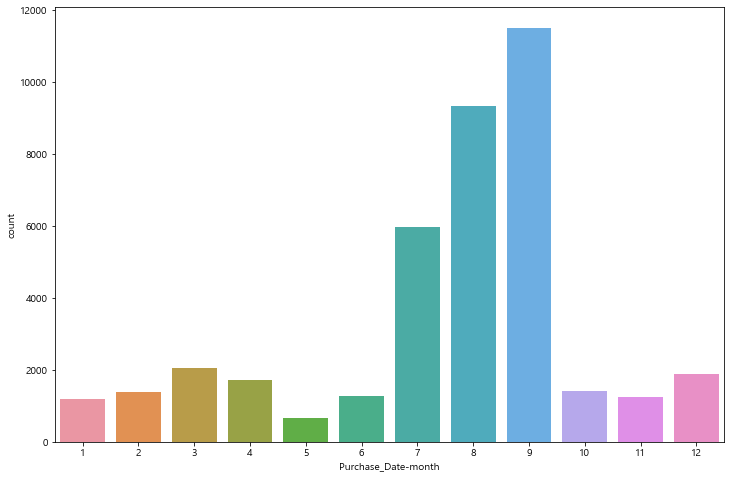

In [233]:
plt.figure(figsize=(12,8))
sns.countplot(data = purchase, x = 'Purchase_Date-month')
#7~9월에 가장 많은 판매건수를 기록
#어떤 물건이 제일 잘 팔렸을까?

In [195]:
purchase.head(3)

,id,Order_Id,User_Id,Purchase_Date,Period,Retailer,ProductCode,Item_Description,Sales_Unit,Price,...,Gender,MasterProdcutNo,MasterProdcutName,MasterCategoryFullNo,MasterCategoryFullName,Purchase_Date-year,Purchase_Date-month,datetime_dayofweek,datetime-dayofweek(int),MasterCategoryFullName2
0,95717,3475eb780c3eeac686a75a00b6b46257,d41d8cd98f00b204e9800998ecf8427e,2019-01-18,20190103,A,2.01901E+15,우리가 보낸 가장 긴 밤,1,12400,...,M,2.01901E+15,우리가 보낸 가장 긴 밤,C001002700080009,문구 · 취미 · 자동차용품->도서 · 퍼즐->시 · 에세이,2019,1,Friday,4,문구 · 취미 · 자동차용품
1,95718,3475eb780c3eeac686a75a00b6b46257,981ac26310e4d1ab74ae250b71fb1bbe,2019-01-18,20190103,A,2.01901E+15,우리가 보낸 가장 긴 밤,1,12400,...,M,2.01901E+15,우리가 보낸 가장 긴 밤,C001002700080009,문구 · 취미 · 자동차용품->도서 · 퍼즐->시 · 에세이,2019,1,Friday,4,문구 · 취미 · 자동차용품
2,95723,129cb9a1a99323fac25a823772be46bf,981ac26310e4d1ab74ae250b71fb1bbe,2019-09-02,20190136,C,8.80111E+12,풀무원 옛두부 300g*2,1,4300,...,M,8.80111E+12,풀무원 옛두부(300G*2입),C001001200110002,채소->두부 · 콩나물 · 나또->부침용 두부,2019,9,Monday,0,채소


In [206]:
#7,8,9월에 구매한 내역 출력
purchase_summer = purchase.loc[(purchase['Purchase_Date-month']==7)|(purchase['Purchase_Date-month']==8)|(purchase['Purchase_Date-month']==9)]
print(purchase_summer.shape)
purchase_summer.head()

(26816, 21)


,id,Order_Id,User_Id,Purchase_Date,Period,Retailer,ProductCode,Item_Description,Sales_Unit,Price,...,Gender,MasterProdcutNo,MasterProdcutName,MasterCategoryFullNo,MasterCategoryFullName,Purchase_Date-year,Purchase_Date-month,datetime_dayofweek,datetime-dayofweek(int),MasterCategoryFullName2
2,95723,129cb9a1a99323fac25a823772be46bf,981ac26310e4d1ab74ae250b71fb1bbe,2019-09-02,20190136,C,8.80111E+12,풀무원 옛두부 300g*2,1,4300,...,M,8.80111E+12,풀무원 옛두부(300G*2입),C001001200110002,채소->두부 · 콩나물 · 나또->부침용 두부,2019,9,Monday,0,채소
3,95724,64453d5c2038f67ee4b87ed1c1213304,981ac26310e4d1ab74ae250b71fb1bbe,2019-09-02,20190136,C,1.20855E+12,프리미엄생연어초밥,2,10000,...,M,1.20855E+12,프리미엄생연어초밥,C001004000080002,치킨 · 초밥 · 베이커리->김밥 · 초밥 · 샐러드->김밥 · 초밥 · 도시락,2019,9,Monday,0,치킨 · 초밥 · 베이커리
4,95725,1501590f2e9f4c521f1d6f0337276621,981ac26310e4d1ab74ae250b71fb1bbe,2019-09-02,20190136,C,2.5E+12,완숙토마토6~8입/팩,1,5000,...,M,2.5E+12,완숙토마토6~8입/팩,C001001300050001,과일->토마토 · 수박 · 참외 · 메론->토마토,2019,9,Monday,0,과일
5,95726,7c63194e389f5df805a53f46c0ede87a,981ac26310e4d1ab74ae250b71fb1bbe,2019-09-02,20190136,C,2.5E+12,제스프리그린키위/팩,1,7000,...,M,2.00015E+12,제스프리그린키위팩,C001001300040001,과일->키위 · 참다래->그린키위,2019,9,Monday,0,과일
6,95727,51d62075bfeaf86449d78f5ec4667e38,981ac26310e4d1ab74ae250b71fb1bbe,2019-09-02,20190136,C,2.5E+12,햇사과 1.8kg/봉,1,8400,...,M,2.5E+12,햇사과 1.8kg/봉,C001001300010001,과일->사과 · 배->사과,2019,9,Monday,0,과일


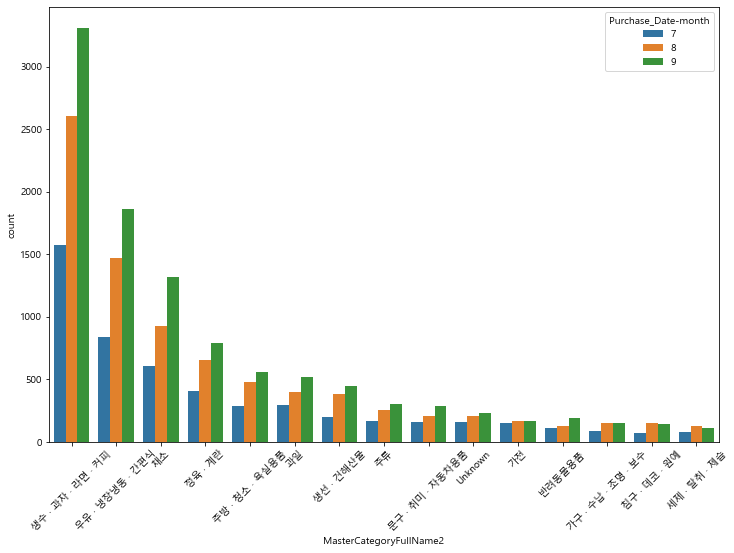

In [210]:
plt.figure(figsize=(12,8))
sns.countplot(data=purchase_summer,x='MasterCategoryFullName2',hue='Purchase_Date-month'
              ,order = purchase_summer['MasterCategoryFullName2'].value_counts().index[:15])
plt.xticks(rotation=45)
plt.show()

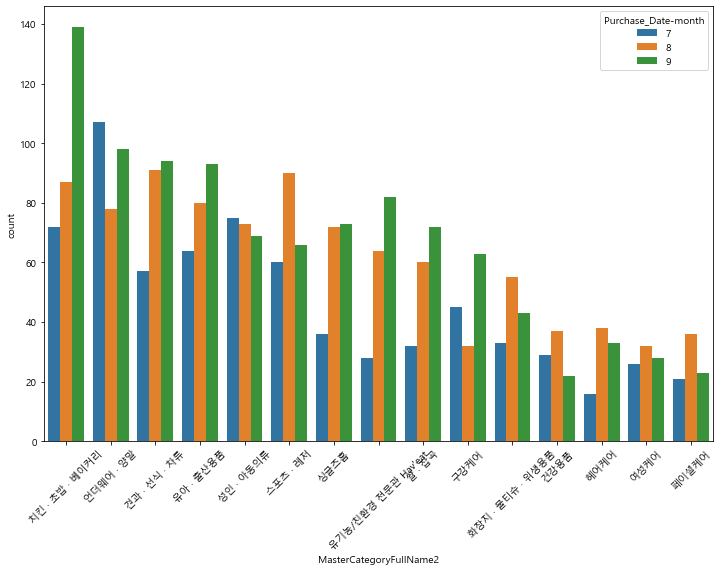

In [215]:
plt.figure(figsize=(12,8))
sns.countplot(data=purchase_summer,x='MasterCategoryFullName2',hue='Purchase_Date-month'
              ,order = purchase_summer['MasterCategoryFullName2'].value_counts().index[15:30])
plt.xticks(rotation=45)
plt.show()

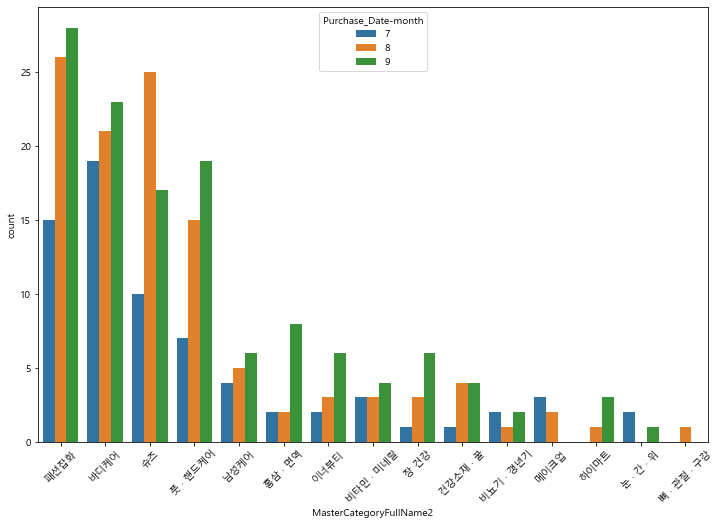

In [216]:
plt.figure(figsize=(12,8))
sns.countplot(data=purchase_summer,x='MasterCategoryFullName2',hue='Purchase_Date-month'
              ,order = purchase_summer['MasterCategoryFullName2'].value_counts().index[30:])
plt.xticks(rotation=45)
plt.show()

In [220]:
purchase['datetime_dayofweek'].value_counts().index

Index(['Saturday', 'Friday', 'Sunday', 'Monday', 'Wednesday', 'Thursday',
       'Tuesday'],
      dtype='object')

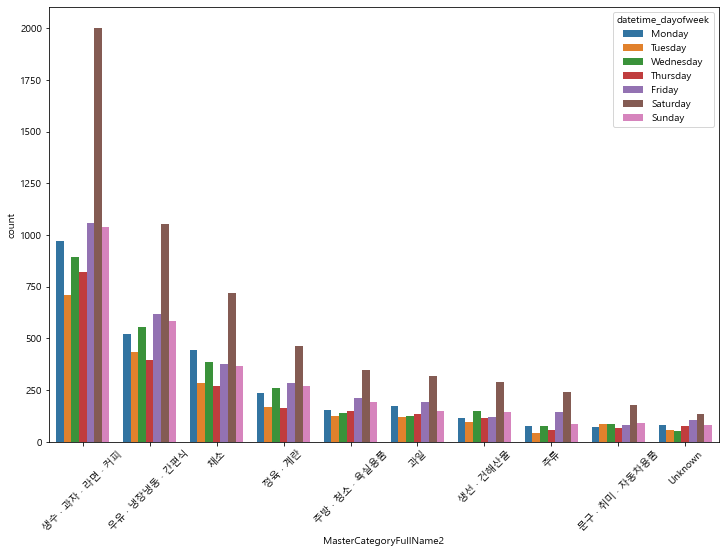

In [221]:
hue_order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday',  'Sunday']
plt.figure(figsize=(12,8))
sns.countplot(data=purchase_summer,x='MasterCategoryFullName2',hue='datetime_dayofweek',hue_order=hue_order
              ,order = purchase_summer['MasterCategoryFullName2'].value_counts().index[:10])
plt.xticks(rotation=45)
plt.show()

상위 품목들이 대체로 화,목 구매수가 저조하다. 반면 같은 평일인 월,수,금은 높다.

In [232]:
purchase['Purchase_Date-year'].value_counts()

2020    35929
2019     3690
Name: Purchase_Date-year, dtype: int64

Timestamp('2020-10-04 00:00:00')